# CONTEÚDO DO FICHEIRO

**Ficheiro**: Neste ficheiro apresentamos o tratamento de dados completo, tal como esta no relatório, para este dataset. Também apresentamos um conjunto de modelos aplicados ao dataset de teste e avaliamos a sua precisão e matriz de confusão.

# Prevenção de AVC

O objetivo deste trabalho passa por desenvolver modelos de *Machine Learning* capazes de prever se um paciente tem probabilidade de ter AVC com base nas característica do paciente, como o genero, idade, residencia, niveis de glucose, massa corporal, hipertenção entre outros.

**Problema supervisionado de classificação**

## IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

## DATASET

O dataset utilizado é constituido pelo os seguintes parâmetros:
- **id** - identificador único do pacinete
- **gender** - Género do paciente ("Male" - masculino, "Female" - feminino, "Other" - outro)
- **age** - idade do paciente
- **hypertension** - hipertensão do paciente (0 - não tem hipertensão, 1 - tem hipertensão)
- **heart_disease** - se o paciente tem doenças cardiovasculares (0 - se não tem, 1 - se tem)
- **ever_married** -  se o paciente for casado ( 'No' - Não, 'Yes' - Sim)
- **work_type** - tipo do trabalho do paciente ( "children" - paciente é menor , "Govt_jov" - trabalho do governo, "Never_worked" - nunca trabalhou, "Private" - trabalho no setor privado, "Self-employed" - trabalhador por conta própria.
- **Residence_type** - residência do paciente ("Rural" - rural e "Urban" - urbano)
- **avg_glucose_level** - média do nivel de glicose no sangue
- **bmi** - indice de massa corporal
- **smoking_status** - estado de fumador ("formerly smoked" - já fumou, "never smoked" - nunca fumou, "smokes" - fuma or "Unknown" - desconhecido (informação desconhecida))
- **stroke** - *target* do modelo (1 - se o paciente tem probabilidade de ter um AVC, 0 - se não tem menor probabilidade de ter um AVC)

In [2]:
stroke = pd.read_csv('dataset-stroke.csv')

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [7]:
stroke["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [8]:
stroke["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [9]:
stroke["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [10]:
stroke["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
print(stroke.isna().sum()) 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## VISUALIZAÇÃO DOS DADOS

In [12]:
sns.set_theme(palette="pastel")

<AxesSubplot:>

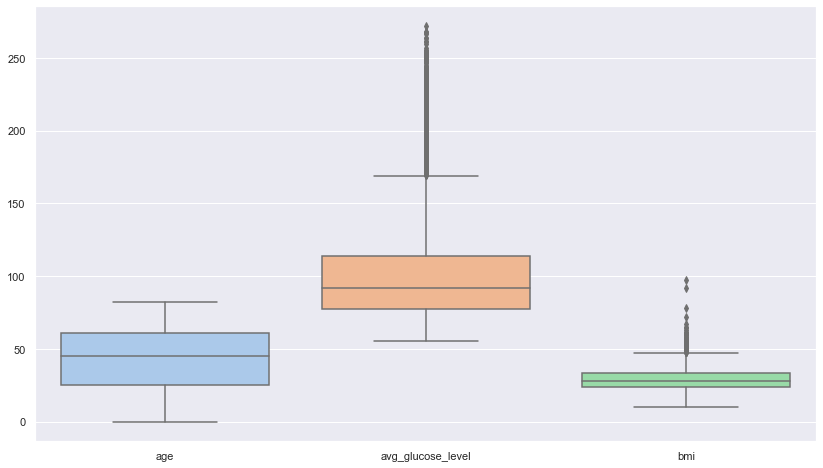

In [13]:
stroke_aux = stroke.drop(['id','hypertension','heart_disease','stroke'], axis=1)
plt.subplots(figsize=(14,8))
sns.boxplot(data=stroke_aux)

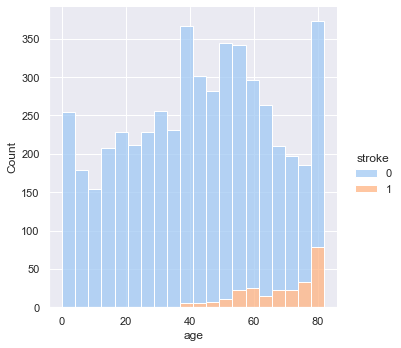

In [14]:
sns.displot(data=stroke, x="age", hue="stroke", multiple="stack")

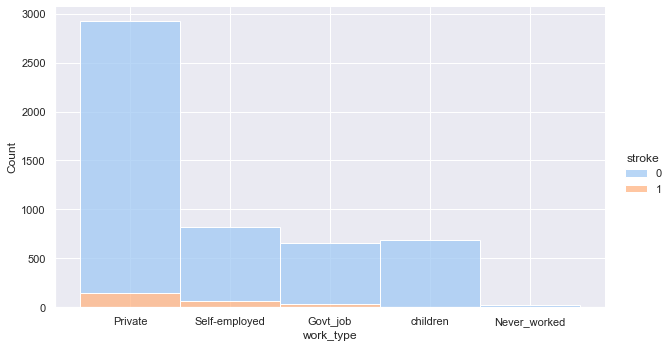

In [15]:
#plt.subplots(figsize=(14,8))
sns.displot(data=stroke, x="work_type", hue="stroke", multiple="stack", aspect=14/8)

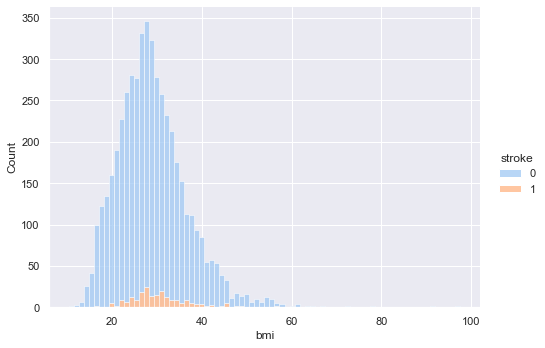

In [16]:
sns.displot(data=stroke, x="bmi", hue="stroke", multiple="stack", aspect=14/10)

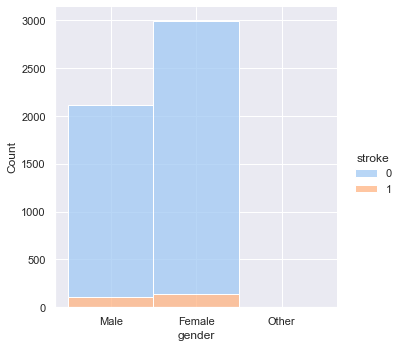

In [17]:
sns.displot(data=stroke, x="gender", hue="stroke", multiple="stack")

<AxesSubplot:>

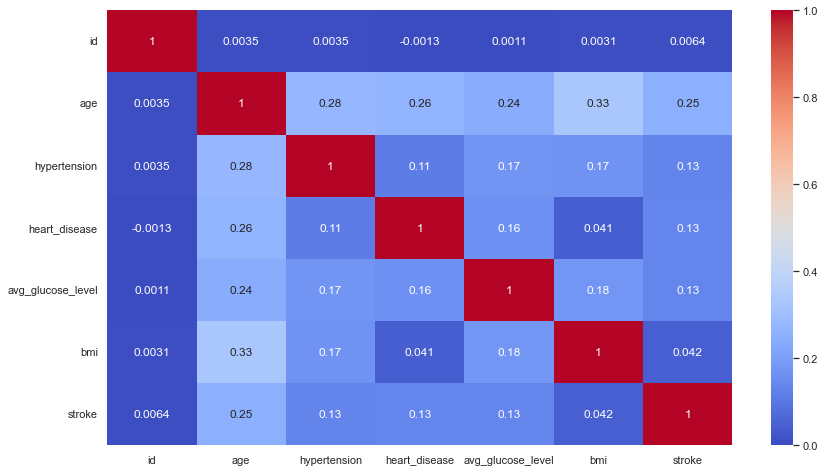

In [18]:
plt.subplots(figsize=(14,8))
sns.heatmap(stroke.corr(), annot = True, cmap='coolwarm')

## FASE 1
**Tratamento dos dados**
- remover o identifcador único;
- categorizar gender, ever_married, work_type, Residence_type, smoking_status
- fazer normalização dos dados

**QUESTÕES**
- transformar o genero other em male ou female - visto que só há um valor desse tipo
- transformar a coluna bmi nas várias categorias de bmi (body weight deficit, norm, weight over, obesity first degree, obesity second degree, obesity third degree)
- transformar outilers

### Remoção de colunas redundantes

In [19]:
stroke = stroke.drop(['id'], axis=1)

### Transformação do tipo de dados

In [20]:
stroke["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [21]:
stroke["age"] = stroke.age.astype(int)

In [22]:
stroke["age"].describe()

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

### Preencher valores a null

In [23]:
mean = stroke["bmi"].mean()
stroke["bmi"] = stroke["bmi"].replace(np.nan, mean)

### Tratamento dos outliers

<AxesSubplot:xlabel='bmi'>

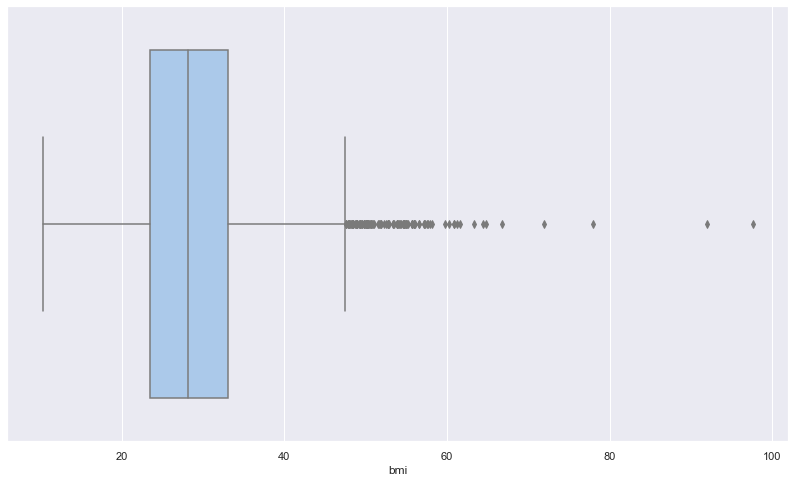

In [24]:
plt.subplots(figsize=(14,8))
sns.boxplot(data=stroke_aux, x='bmi')

In [25]:
mean = stroke.loc[stroke['bmi']<78, 'bmi'].mean()
stroke.loc[stroke.bmi > 78, 'bmi'] = np.nan
stroke.loc[stroke.bmi < 12, 'bmi'] = np.nan
stroke.fillna(mean,inplace=True)

<AxesSubplot:xlabel='bmi'>

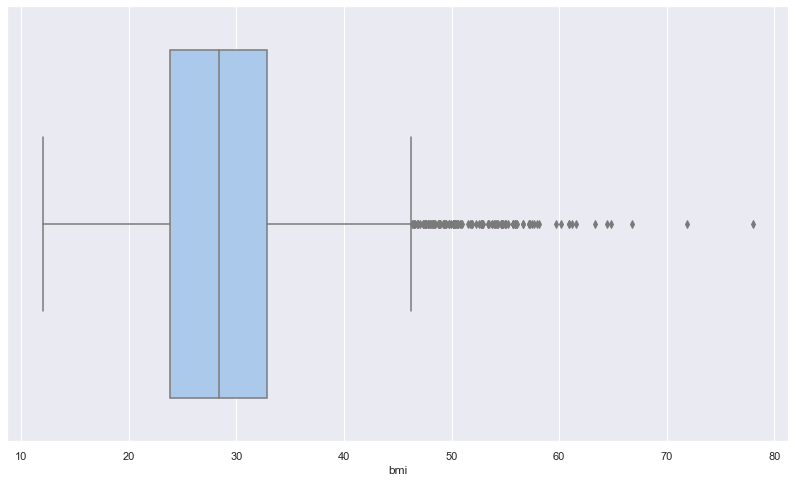

In [26]:
plt.subplots(figsize=(14,8))
sns.boxplot(data=stroke, x='bmi')

### Agrupamento de dados

In [27]:
bmi_group = []
for bmi in stroke['bmi']:
    if bmi < 18.5:
        bmi_group.append("underweight")
    
    elif (bmi >= 18.5) & (bmi <= 24.9):
        bmi_group.append("normal")
    
    elif (bmi >= 25.0) & (bmi <= 29.9):
        bmi_group.append("overweight")
    
    elif (bmi >= 30.0) & (bmi <= 34.9):
        bmi_group.append("obese")
    
    elif bmi >= 35.0:
        bmi_group.append("extremly obese")
    
stroke['bmi_group'] = bmi_group   
stroke = stroke.drop(['bmi'], axis=1)

### Normalização e Standardização dos dados

Para os valores de idade, avg_glucose_level e bmi é necessário ter os dados normalizados.

In [28]:
#Normalização da idade
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
stroke[['age']] = min_max_scaler.fit_transform(stroke[['age']])
stroke['age'].describe()

count    5110.000000
mean        0.527015
std         0.276023
min         0.000000
25%         0.304878
50%         0.548780
75%         0.743902
max         1.000000
Name: age, dtype: float64

In [29]:
#Normalização do nivel de glicose
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
stroke[['avg_glucose_level']] = min_max_scaler.fit_transform(stroke[['avg_glucose_level']])
stroke['avg_glucose_level'].describe()

count    5110.000000
mean        0.235563
std         0.209046
min         0.000000
25%         0.102137
50%         0.169721
75%         0.272228
max         1.000000
Name: avg_glucose_level, dtype: float64

In [30]:
# Normalização do bmi
'''
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
stroke[['bmi']] = min_max_scaler.fit_transform(stroke[['bmi']])
stroke['bmi'].describe()
'''

"\nmin_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))\nstroke[['bmi']] = min_max_scaler.fit_transform(stroke[['bmi']])\nstroke['bmi'].describe()\n"

<AxesSubplot:>

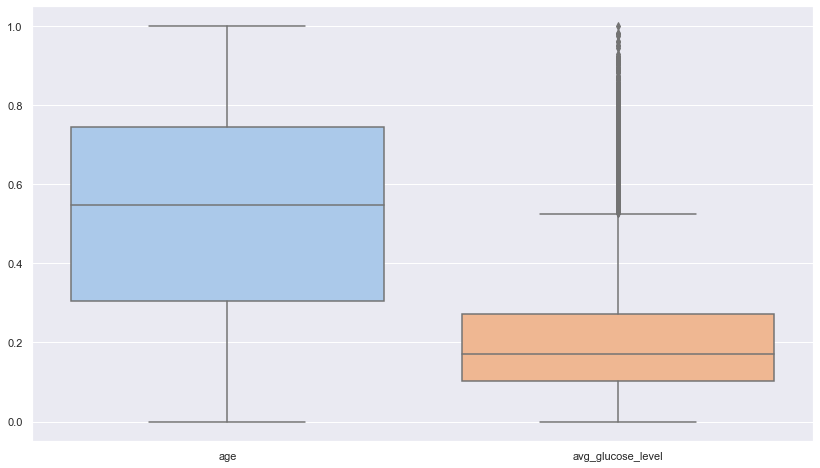

In [31]:
stroke_aux = stroke.drop(['hypertension','heart_disease','stroke', 'bmi_group'], axis=1)
#stroke_aux = stroke.drop(['hypertension','heart_disease','stroke'], axis=1)
plt.subplots(figsize=(14,8))
sns.boxplot(data=stroke_aux)

### Transformação dos dados categóricos

In [32]:
stroke = pd.get_dummies(stroke, drop_first = True)

### Dataset Final

In [33]:
stroke.to_csv("stroke_final.csv", index=False) 

<AxesSubplot:>

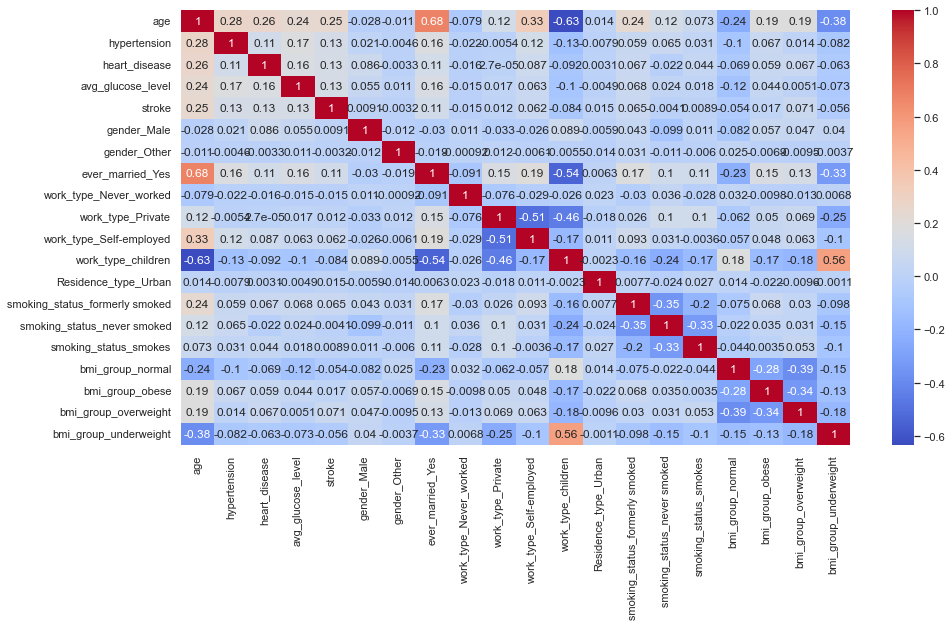

In [34]:
plt.subplots(figsize=(15,8))
sns.heatmap(stroke.corr(), annot = True, cmap='coolwarm')

## FASE 2
**Criação dos modelos**

In [35]:
x = stroke.drop(["stroke"], axis=1)
y = stroke["stroke"]

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=2021)

In [37]:
x

,age,hypertension,heart_disease,avg_glucose_level,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_group_normal,bmi_group_obese,bmi_group_overweight,bmi_group_underweight
0,0.817073,0,1,0.801265,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0
1,0.743902,0,0,0.679023,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,0.975610,0,1,0.234512,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
3,0.597561,0,0,0.536008,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
4,0.963415,1,0,0.549349,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975610,1,0,0.132167,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
5106,0.987805,0,0,0.323516,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
5107,0.426829,0,0,0.128658,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
5108,0.621951,0,0,0.513203,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [38]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

### Decision Tree

In [39]:
modelDecisionTree = DecisionTreeClassifier()
scores = cross_val_score(modelDecisionTree, x, y, cv=10)
print("Result for Decision Tree: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))
#Train the model using the training sets y_pred=clf.predict(X_test)

Result for Decision Tree: 0.9027 accuracy with standard deviation of 0.01


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1219
           1       0.17      0.25      0.20        59

    accuracy                           0.91      1278
   macro avg       0.57      0.60      0.58      1278
weighted avg       0.93      0.91      0.92      1278



<function matplotlib.pyplot.show(close=None, block=None)>

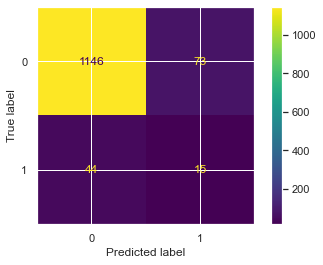

In [40]:
modelDecisionTree.fit(X_train,Y_train)
predictions = modelDecisionTree.predict(X_test)
print(classification_report(Y_test,predictions))
plot_confusion_matrix(modelDecisionTree,X_test,Y_test)
plt.show

### Random Forest

In [41]:
modelRandomForest = RandomForestClassifier(n_estimators = 500)
scores = cross_val_score(modelRandomForest, x, y, cv=10)
print("Result for Random Forest: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

Result for Random Forest: 0.9479 accuracy with standard deviation of 0.00


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1219
           1       0.20      0.02      0.03        59

    accuracy                           0.95      1278
   macro avg       0.58      0.51      0.50      1278
weighted avg       0.92      0.95      0.93      1278



<function matplotlib.pyplot.show(close=None, block=None)>

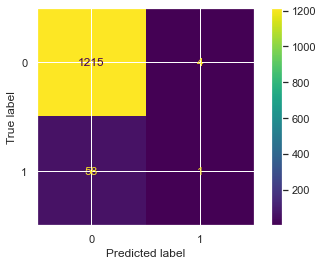

In [42]:
modelRandomForest.fit(X_train,Y_train)
predictions = modelRandomForest.predict(X_test)
print(classification_report(Y_test,predictions))
plot_confusion_matrix(modelRandomForest,X_test,Y_test)
plt.show